In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\Abdul rahim\Downloads\PMGSY_DATASET.csv")
df.head()

,STATE_NAME,DISTRICT_NAME,PMGSY_SCHEME,NO_OF_ROAD_WORK_SANCTIONED,LENGTH_OF_ROAD_WORK_SANCTIONED,NO_OF_BRIDGES_SANCTIONED,COST_OF_WORKS_SANCTIONED,NO_OF_ROAD_WORKS_COMPLETED,LENGTH_OF_ROAD_WORK_COMPLETED,NO_OF_BRIDGES_COMPLETED,EXPENDITURE_OCCURED,NO_OF_ROAD_WORKS_BALANCE,LENGTH_OF_ROAD_WORK_BALANCE,NO_OF_BRIDGES_BALANCE,Unnamed: 14
0,Andaman And Nicobar,Nicobar,PMGSY-I,3,2.969,0,1.38570,3,2.969,0,1.1082,0,0.000,0,NaN
1,Andaman And Nicobar,North and Middle Andaman,PMGSY-I,32,60.169,0,24.69080,32,59.190,0,18.5754,0,0.000,0,NaN
2,Andaman And Nicobar,North and Middle Andaman,PMGSY-II,24,54.670,0,27.76460,0,0.000,0,0.0000,24,54.670,0,NaN
3,Andaman And Nicobar,South Andaman,PMGSY-I,32,40.146,0,18.53750,31,39.287,0,11.6894,1,0.541,0,NaN
4,Andaman And Nicobar,South Andaman,PMGSY-II,24,41.992,0,23.42439,7,17.747,0,8.6343,17,24.033,0,NaN


In [4]:
print(df.isnull().sum())

STATE_NAME                           0
DISTRICT_NAME                        0
PMGSY_SCHEME                         0
NO_OF_ROAD_WORK_SANCTIONED           0
LENGTH_OF_ROAD_WORK_SANCTIONED       0
NO_OF_BRIDGES_SANCTIONED             0
COST_OF_WORKS_SANCTIONED            52
NO_OF_ROAD_WORKS_COMPLETED           0
LENGTH_OF_ROAD_WORK_COMPLETED        0
NO_OF_BRIDGES_COMPLETED              0
EXPENDITURE_OCCURED                  0
NO_OF_ROAD_WORKS_BALANCE             0
LENGTH_OF_ROAD_WORK_BALANCE          0
NO_OF_BRIDGES_BALANCE                0
Unnamed: 14                       2189
dtype: int64


In [5]:
df.drop(columns=["Unnamed: 14"],inplace=True)

In [6]:
df["COST_OF_WORKS_SANCTIONED"] = df["COST_OF_WORKS_SANCTIONED"].fillna(df["COST_OF_WORKS_SANCTIONED"].median())


In [7]:
le_state=LabelEncoder()
le_district=LabelEncoder()
le_scheme=LabelEncoder()

df['STATE_ENC']=le_state.fit_transform(df['STATE_NAME'])
df['DISTRICT_ENC']=le_district.fit_transform(df['DISTRICT_NAME'])
df['SCHEME_ENC']=le_scheme.fit_transform(df["PMGSY_SCHEME"])


In [8]:
df.drop(["STATE_NAME","DISTRICT_NAME","PMGSY_SCHEME"],axis=1,inplace=True)

In [9]:
df["ROAD_COMPLETION_RATE"] = df["NO_OF_ROAD_WORKS_COMPLETED"] / (df["NO_OF_ROAD_WORK_SANCTIONED"] + 1e-6)
df["BRIDGE_COMPLETION_RATE"] = df["NO_OF_BRIDGES_COMPLETED"] / (df["NO_OF_BRIDGES_SANCTIONED"] + 1e-6)
df["COST_PER_KM"] = df["COST_OF_WORKS_SANCTIONED"] / (df["LENGTH_OF_ROAD_WORK_SANCTIONED"] + 1e-6)
df["EXPENDITURE_RATIO"] = df["EXPENDITURE_OCCURED"] / (df["COST_OF_WORKS_SANCTIONED"] + 1e-6)

In [10]:
X=df.drop("SCHEME_ENC",axis=1)
y=df["SCHEME_ENC"]

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [26]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=300, learning_rate=0.3, max_depth=6, random_state=42)
xgb.fit(X_train_scaled, y_train)

y_pred = xgb.predict(X_test_scaled)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

XGBoost Accuracy: 0.9223744292237442

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.97      0.95      0.96       143
           2       0.87      0.95      0.91       128
           3       0.92      0.90      0.91       150
           4       0.83      0.45      0.59        11

    accuracy                           0.92       438
   macro avg       0.92      0.85      0.87       438
weighted avg       0.92      0.92      0.92       438



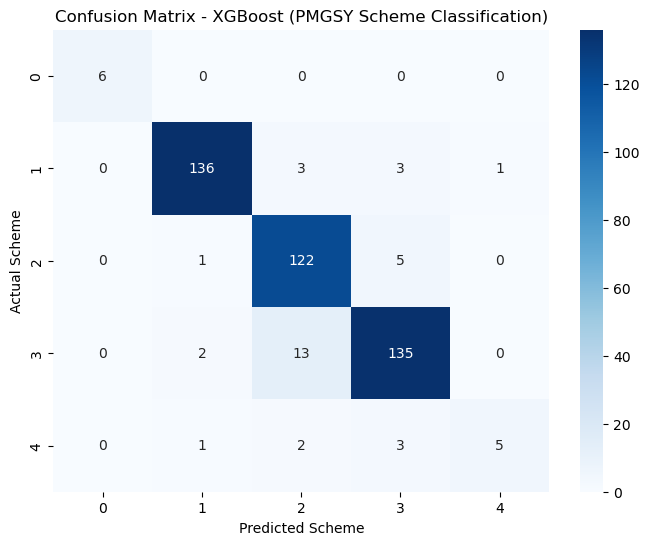

In [23]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel("Predicted Scheme")
plt.ylabel("Actual Scheme")
plt.title("Confusion Matrix - XGBoost (PMGSY Scheme Classification)")
plt.show()